C:\Users\basde\AppData\Local\Temp\ipykernel_7780\2049706040.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_df = df.groupby(feature_to_encode)[target_variable].value_counts().unstack(fill_value=0)


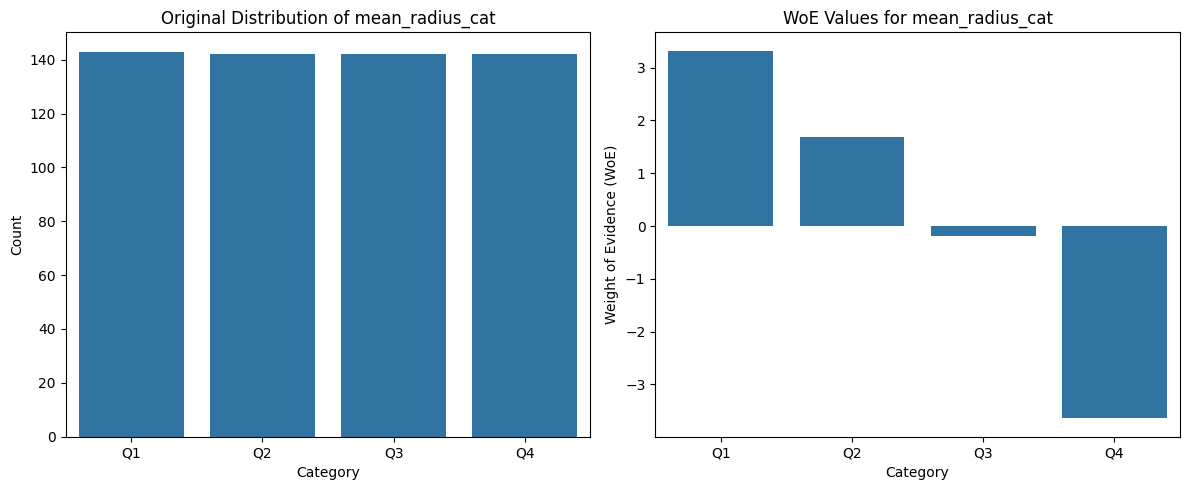

DataFrame with WoE encoded column:
  mean_radius_cat mean_radius_cat_woe  target
0              Q4           -3.642045       0
1              Q4           -3.642045       0
2              Q4           -3.642045       0
3              Q1            3.321881       0
4              Q4           -3.642045       0

WoE Calculation Summary Table:
                 non_events  events   event_%  non_event_%       WoE
mean_radius_cat                                                     
Q1                        3     140  0.392157     0.014151  3.321881
Q2                       14     128  0.358543     0.066038  1.691823
Q3                       59      83  0.232493     0.278302 -0.179846
Q4                      136       6  0.016807     0.641509 -3.642045


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# --- When to Use WoE Encoding ---
# Weight of Evidence (WoE) is a feature transformation technique primarily used in credit scoring
# for binary classification problems. It helps to:
# 1.  Transform categorical variables into numerical ones.
# 2.  Establish a monotonic relationship between the independent variable and the target variable.
# 3.  Handle missing values by treating them as a separate category.
# 4.  The output of WoE can be directly used in a logistic regression model, as it is on a log-odds scale.

# --- Data Requirements ---
# 1.  The target variable must be binary (e.g., 0 or 1, 'good' or 'bad').
# 2.  The features to be encoded are typically categorical. Continuous variables need to be binned first.
# 3.  Each category should have a sufficient number of observations (both events and non-events). A common rule of thumb is at least 5% of the total observations.

# 1. FIND AND LOAD A RELEVANT DATASET
# We'll use the breast cancer dataset from scikit-learn, which has a binary target.
# To make it more suitable for this demonstration, we will discretize a continuous feature
# to simulate a categorical variable.
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# For demonstration, let's discretize the 'mean radius' feature into bins
# to create a categorical variable.
df['mean_radius_cat'] = pd.qcut(df['mean radius'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 2. SELECT A FEATURE TO WORK WITH
feature_to_encode = 'mean_radius_cat'
target_variable = 'target'

# 3. APPLY WEIGHT OF EVIDENCE (WoE) ENCODING
# We'll calculate WoE for the 'mean_radius_cat' feature.

# First, create a summary table to calculate the number of events (1) and non-events (0)
# for each category of the feature.
woe_df = df.groupby(feature_to_encode)[target_variable].value_counts().unstack(fill_value=0)
woe_df.columns = ['non_events', 'events']

# Calculate the total number of events and non-events
total_events = woe_df['events'].sum()
total_non_events = woe_df['non_events'].sum()

# Calculate the percentage of events and non-events for each category
woe_df['event_%'] = woe_df['events'] / total_events
woe_df['non_event_%'] = woe_df['non_events'] / total_non_events

# Add a small constant to avoid division by zero if a category has no events or non-events
woe_df['non_event_%'] = woe_df['non_event_%'].replace(0, 0.00001)

# Calculate WoE
woe_df['WoE'] = np.log(woe_df['event_%'] / woe_df['non_event_%'])

# Map the WoE values back to the original DataFrame
df[f'{feature_to_encode}_woe'] = df[feature_to_encode].map(woe_df['WoE'])

# 4. SHOW THE RESULT OF APPLYING THE TECHNIQUE

# --- Before and After Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before: Distribution of original categorical feature
sns.countplot(x=feature_to_encode, data=df, ax=ax1)
ax1.set_title(f'Original Distribution of {feature_to_encode}')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

# After: WoE values for each category
sns.barplot(x=woe_df.index, y=woe_df['WoE'], ax=ax2)
ax2.set_title(f'WoE Values for {feature_to_encode}')
ax2.set_xlabel('Category')
ax2.set_ylabel('Weight of Evidence (WoE)')

plt.tight_layout()
plt.show()

# --- Print the head of the resulting DataFrame ---
print("DataFrame with WoE encoded column:")
print(df[[feature_to_encode, f'{feature_to_encode}_woe', 'target']].head())

print("\nWoE Calculation Summary Table:")
print(woe_df)

